# 基于统计的语言模型 ngram


In [3]:
# gram的语言模型
sentences =[
    "我爱北京天安门",
    "天安门上太阳升",
    "我爱北京大学",
    "我爱北京的蓝天",
    "我爱北京的白云",
    "我爱蓝天白云",
]
unigrams = {}
bigrams = {}
trigrams = {}
for sentence in sentences:
    sentence = sentence.strip()
    words = list(sentence)
    # 计算unigrams
    for word in words:
        if word not in unigrams:
            unigrams[word] = 0
        unigrams[word] += 1
    # 计算bigrams
    for i in range(len(words)-1):
        bigram = (words[i], words[i+1])
        if bigram not in bigrams:
            bigrams[bigram] = 0
        bigrams[bigram] += 1
    # 计算trigrams
    for i in range(len(words)-2):
        trigram = (words[i], words[i+1], words[i+2])
        if trigram not in trigrams:
            trigrams[trigram] = 0
        trigrams[trigram] += 1
# 计算unigrams的概率
total_unigrams = sum(unigrams.values())
for word in unigrams:
    unigrams[word] /= total_unigrams
# 计算bigrams的概率
total_bigrams = sum(bigrams.values())
for bigram in bigrams:
    bigrams[bigram] /= total_bigrams
# 计算trigrams的概率
total_trigrams = sum(trigrams.values())
for trigram in trigrams:
    trigrams[trigram] /= total_trigrams
# 输出结果
print("Unigrams:")
for word, prob in unigrams.items():
    print(f"{word}: {prob:.4f}")
print("\nBigrams:")
for bigram, prob in bigrams.items():
    print(f"{bigram}: {prob:.4f}")
print("\nTrigrams:")
for trigram, prob in trigrams.items():
    print(f"{trigram}: {prob:.4f}")

Unigrams:
我: 0.1250
爱: 0.1250
北: 0.1000
京: 0.1000
天: 0.1000
安: 0.0500
门: 0.0500
上: 0.0250
太: 0.0250
阳: 0.0250
升: 0.0250
大: 0.0250
学: 0.0250
的: 0.0500
蓝: 0.0500
白: 0.0500
云: 0.0500

Bigrams:
('我', '爱'): 0.1471
('爱', '北'): 0.1176
('北', '京'): 0.1176
('京', '天'): 0.0294
('天', '安'): 0.0588
('安', '门'): 0.0588
('门', '上'): 0.0294
('上', '太'): 0.0294
('太', '阳'): 0.0294
('阳', '升'): 0.0294
('京', '大'): 0.0294
('大', '学'): 0.0294
('京', '的'): 0.0588
('的', '蓝'): 0.0294
('蓝', '天'): 0.0588
('的', '白'): 0.0294
('白', '云'): 0.0588
('爱', '蓝'): 0.0294
('天', '白'): 0.0294

Trigrams:
('我', '爱', '北'): 0.1429
('爱', '北', '京'): 0.1429
('北', '京', '天'): 0.0357
('京', '天', '安'): 0.0357
('天', '安', '门'): 0.0714
('安', '门', '上'): 0.0357
('门', '上', '太'): 0.0357
('上', '太', '阳'): 0.0357
('太', '阳', '升'): 0.0357
('北', '京', '大'): 0.0357
('京', '大', '学'): 0.0357
('北', '京', '的'): 0.0714
('京', '的', '蓝'): 0.0357
('的', '蓝', '天'): 0.0357
('京', '的', '白'): 0.0357
('的', '白', '云'): 0.0357
('我', '爱', '蓝'): 0.0357
('爱', '蓝', '天'): 0.0357
('蓝', 

In [9]:
# 计算句子的概率
cases = [
    "我爱北京天安门",
    "我爱北京的蓝天",
    "我爱蓝天白云",
]
for case in cases:
    case = case.strip()
    words = list(case)
    print(words)
    prob = 1.0
    # 计算unigrams的概率
    for word in words:
        if word in unigrams:
            prob *= unigrams[word]
        else:
            prob *= 0.0
    # 计算bigrams的概率
    for i in range(len(words)-1):
        bigram = (words[i], words[i+1])
        if bigram in bigrams:
            prob *= bigrams[bigram]
        else:
            prob *= 0.0
    # 计算trigrams的概率
    for i in range(len(words)-2):
        trigram = (words[i], words[i+1], words[i+2])
        if trigram in trigrams:
            prob *= trigrams[trigram]
        else:
            prob *= 0.0
    print(f"Probability of '{case}': {prob:}")


['我', '爱', '北', '京', '天', '安', '门']
Probability of '我爱北京天安门': 1.504514343014011e-20
['我', '爱', '北', '京', '的', '蓝', '天']
Probability of '我爱北京的蓝天': 1.504514343014011e-20
['我', '爱', '蓝', '天', '白', '云']
Probability of '我爱蓝天白云': 1.3987281782708383e-19


# 基于学习的语言模型


- 假设类: 所有可能机器学习模型的几何，元素为一个假设。通常是模型架构搭建好，寻找最合适的一组参数
- 归纳偏置: SVM 让两类尽量分得快，人为可控的能对模型产生较大影响的规则，比如LLM 上下文存在关联，CNN 局部感受野， RNN 时间序列 Tf 稀疏注意力 
- 学习范式: 监督学习 无监督学习 强化学习
- 学习算法: 
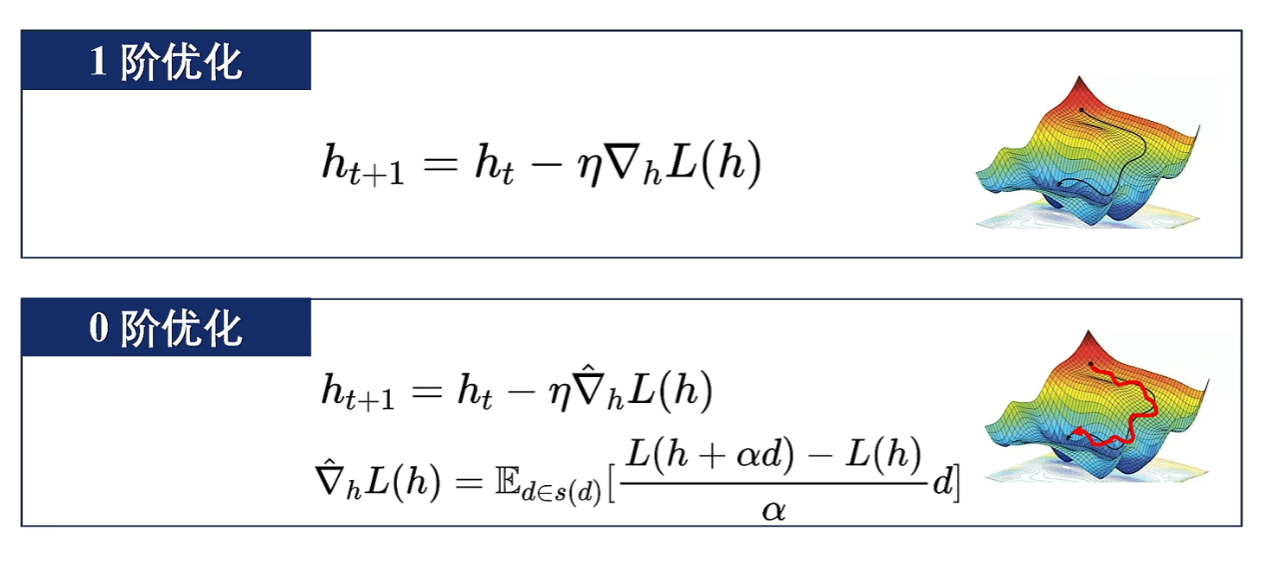
- 泛化误差： 机器学习的目的在于减小泛化误差，即真实误差
- PAC理论 概率近似正确
样本数量足够多时，机器学习可以以一定概率达到近似正确

# RNN 和 Transformer
串行输入对应RNN
并行输入对应Transformer

## RNN
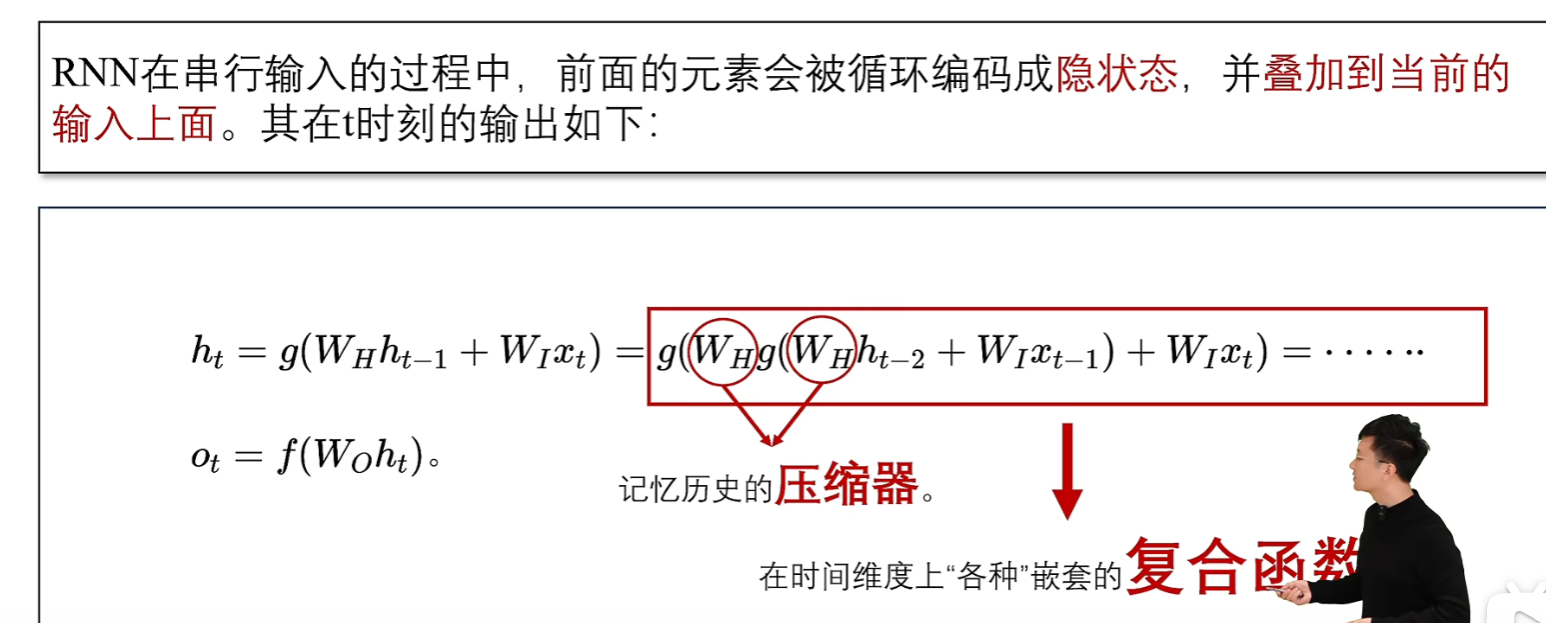

In [40]:
import torch.nn as nn
import torch
import torch.nn.functional as F
# 数据
sentences = [
    "我爱北京天安门",
    "天安门上太阳升",
    "我爱北京大学",
    "我爱北京的蓝天",
    "我爱北京的白云",
    "我爱蓝天白云",
]

# 创建字符到索引的映射
char_to_idx = {char: idx+1 for idx, char in enumerate(set(''.join(sentences)))}  # 从1开始，0留给PAD
char_to_idx['<PAD>'] = 0  # 显式定义填充字符
idx_to_char = {idx: char for char, idx in char_to_idx.items()}  # 创建反向映射

print(char_to_idx)
print(idx_to_char)

# 编码句子
encoded_sentences = []
for sentence in sentences:
    encoded_sentence = [char_to_idx[char] for char in sentence]
    encoded_sentences.append(encoded_sentence)

# 计算最大长度和填充
max_length = max(len(sentence) for sentence in encoded_sentences)
padded_sentences = [sentence + [0] * (max_length - len(sentence)) for sentence in encoded_sentences]
inputs = torch.tensor(padded_sentences, dtype=torch.long)

# 正确生成目标数据（下一个字符预测）
targets = [sentence[1:] + [0] for sentence in encoded_sentences]
targets = torch.tensor([t + [0] * (max_length - len(t)) for t in targets], dtype=torch.long)

class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super(RNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        x = self.embedding(x)  # [batch_size, seq_len, embedding_dim]
        x, _ = self.rnn(x)  # [batch_size, seq_len, hidden_dim]
        x = self.fc(x)  # [batch_size, seq_len, vocab_size]
        return x

# 数据加载器
DataLoader = torch.utils.data.DataLoader(
    list(zip(inputs, targets)), batch_size=2, shuffle=True
)

# 模型和训练参数
vocab_size = len(char_to_idx)
embedding_dim = 32  # 增加嵌入维度
hidden_dim = 64     # 增加隐藏层维度
model = RNN(vocab_size, embedding_dim, hidden_dim)
criterion = nn.CrossEntropyLoss(ignore_index=0)  # 忽略填充字符
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  

# 训练循环
for epoch in range(1000):  # 增加训练轮数
    total_loss = 0
    for inputs, targets in DataLoader:
        optimizer.zero_grad()
        output = model(inputs)  # [batch, seq_len, vocab_size]
        loss = criterion(output.reshape(-1, vocab_size), targets.reshape(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    if (epoch + 1) % 50 == 0:  # 每50轮打印一次
        print(f"Epoch [{epoch + 1}/1000], Loss: {total_loss:.4f}")

# 评估函数
model.eval()
def evalcase(sentence):
    encoded_sentence = [char_to_idx[char] for char in sentence]
    padded_sentence = torch.tensor(
        encoded_sentence + [0] * (max_length - len(encoded_sentence)),
        dtype=torch.long
    ).unsqueeze(0)
    with torch.no_grad():
        output = model(padded_sentence)
        probabilities = F.softmax(output[:, -1], dim=-1)  # 只取最后一个时间步的预测
        _, predicted = torch.max(probabilities, dim=1)
    
    # 使用反向映射
    predicted_char = idx_to_char.get(predicted.item(), '')
    return predicted_char

cases = [
    "我爱北京天",
    "我爱北京的蓝",
    "我爱蓝天白",
    "我"
]
for case in cases:
    evaled_sentence = evalcase(case)
    print(f"Input: {case}, Predicted next: {evaled_sentence}")

{'爱': 1, '太': 2, '白': 3, '天': 4, '升': 5, '大': 6, '北': 7, '门': 8, '蓝': 9, '学': 10, '阳': 11, '的': 12, '安': 13, '云': 14, '我': 15, '京': 16, '上': 17, '<PAD>': 0}
{1: '爱', 2: '太', 3: '白', 4: '天', 5: '升', 6: '大', 7: '北', 8: '门', 9: '蓝', 10: '学', 11: '阳', 12: '的', 13: '安', 14: '云', 15: '我', 16: '京', 17: '上', 0: '<PAD>'}
Epoch [50/1000], Loss: 1.0839
Epoch [100/1000], Loss: 0.8281
Epoch [150/1000], Loss: 0.7656
Epoch [200/1000], Loss: 0.7475
Epoch [250/1000], Loss: 0.7361
Epoch [300/1000], Loss: 0.7424
Epoch [350/1000], Loss: 0.7281
Epoch [400/1000], Loss: 0.7386
Epoch [450/1000], Loss: 0.7365
Epoch [500/1000], Loss: 0.7330
Epoch [550/1000], Loss: 0.7318
Epoch [600/1000], Loss: 0.7303
Epoch [650/1000], Loss: 0.7176
Epoch [700/1000], Loss: 0.7329
Epoch [750/1000], Loss: 0.7153
Epoch [800/1000], Loss: 0.7326
Epoch [850/1000], Loss: 0.7146
Epoch [900/1000], Loss: 0.7295
Epoch [950/1000], Loss: 0.7161
Epoch [1000/1000], Loss: 0.7281
Input: 我爱北京天, Predicted next: 上
Input: 我爱北京的蓝, Predicted next: 白
I

涉及到大量的矩阵连乘，导致梯度变化极端。改进有LSTM

In [ ]:
class LSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super(LSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        x = self.embedding(x)  # [batch_size, seq_len, embedding_dim]
        x, _ = self.lstm(x)  # [batch_size, seq_len, hidden_dim]
        x = self.fc(x)  # [batch_size, seq_len, vocab_size]
        return x

In [ ]:
model = LSTM(vocab_size, embedding_dim, hidden_dim)
criterion = nn.CrossEntropyLoss(ignore_index=0)  # 忽略填充字符
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

# 训练循环
for epoch in range(1000):  # 增加训练轮数
    total_loss = 0
    for inputs, targets in DataLoader:
        optimizer.zero_grad()
        output = model(inputs)  # [batch, seq_len, vocab_size]
        loss = criterion(output.reshape(-1, vocab_size), targets.reshape(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    if (epoch + 1) % 100 == 0:  
        print(f"Epoch [{epoch + 1}/1000], Loss: {total_loss:.4f}")

# 评估函数
model.eval()
def evalcase(sentence):
    encoded_sentence = [char_to_idx[char] for char in sentence]
    padded_sentence = torch.tensor(
        encoded_sentence + [0] * (max_length - len(encoded_sentence)),
        dtype=torch.long
    ).unsqueeze(0)
    with torch.no_grad():
        output = model(padded_sentence)
        probabilities = F.softmax(output[:, -1], dim=-1)  # 只取最后一个时间步的预测
        _, predicted = torch.max(probabilities, dim=1)
    
    # 使用反向映射
    predicted_char = idx_to_char.get(predicted.item(), '')
    return predicted_char

Epoch [100/1000], Loss: 0.7572
Epoch [200/1000], Loss: 0.7444
Epoch [300/1000], Loss: 0.7376
Epoch [400/1000], Loss: 0.7188
Epoch [500/1000], Loss: 0.7348
Epoch [600/1000], Loss: 0.7211
Epoch [700/1000], Loss: 0.7323
Epoch [800/1000], Loss: 0.7284
Epoch [900/1000], Loss: 0.7338
Epoch [1000/1000], Loss: 0.7291


In [43]:
for case in cases:
    evaled_sentence = evalcase(case)
    print(f"Input: {case}, Predicted next: {evaled_sentence}")

Input: 我爱北京天, Predicted next: 上
Input: 我爱北京的蓝, Predicted next: 白
Input: 我爱蓝天白, Predicted next: 云
Input: 我, Predicted next: 云


In [1]:
import torch

import torch.nn as nn
import torch.nn.functional as F

class ManualLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(ManualLSTM, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim

        # 初始化权重矩阵
        self.W_f = nn.Parameter(torch.randn(hidden_dim, input_dim + hidden_dim))
        self.b_f = nn.Parameter(torch.zeros(hidden_dim))

        self.W_i = nn.Parameter(torch.randn(hidden_dim, input_dim + hidden_dim))
        self.b_i = nn.Parameter(torch.zeros(hidden_dim))

        self.W_c = nn.Parameter(torch.randn(hidden_dim, input_dim + hidden_dim))
        self.b_c = nn.Parameter(torch.zeros(hidden_dim))

        self.W_o = nn.Parameter(torch.randn(hidden_dim, input_dim + hidden_dim))
        self.b_o = nn.Parameter(torch.zeros(hidden_dim))

    def forward(self, x, h_prev, c_prev):
        """
        x: 当前时间步的输入 [batch_size, input_dim]
        h_prev: 上一个时间步的隐藏状态 [batch_size, hidden_dim]
        c_prev: 上一个时间步的细胞状态 [batch_size, hidden_dim]
        """
        combined = torch.cat((x, h_prev), dim=1)  # [batch_size, input_dim + hidden_dim]

        # 遗忘门
        f_t = torch.sigmoid(torch.matmul(combined, self.W_f.T) + self.b_f)  # [batch_size, hidden_dim]

        # 输入门
        i_t = torch.sigmoid(torch.matmul(combined, self.W_i.T) + self.b_i)  # [batch_size, hidden_dim]
        c_tilde = torch.tanh(torch.matmul(combined, self.W_c.T) + self.b_c)  # [batch_size, hidden_dim]

        # 更新细胞状态
        c_t = f_t * c_prev + i_t * c_tilde  # [batch_size, hidden_dim]

        # 输出门
        o_t = torch.sigmoid(torch.matmul(combined, self.W_o.T) + self.b_o)  # [batch_size, hidden_dim]
        h_t = o_t * torch.tanh(c_t)  # [batch_size, hidden_dim]

        return h_t, c_t

# 测试手动实现的LSTM
batch_size = 2
input_dim = 3
hidden_dim = 4
seq_len = 5

# 初始化模型
manual_lstm = ManualLSTM(input_dim, hidden_dim)

# 随机生成输入数据
inputs = torch.randn(batch_size, seq_len, input_dim)
h_t = torch.zeros(batch_size, hidden_dim)
c_t = torch.zeros(batch_size, hidden_dim)

# 按时间步处理序列数据
for t in range(seq_len):
    x_t = inputs[:, t, :]  # 当前时间步的输入
    h_t, c_t = manual_lstm(x_t, h_t, c_t)

print("Final hidden state:", h_t)
print("Final cell state:", c_t)

Final hidden state: tensor([[ 0.0067,  0.1143,  0.2351,  0.1177],
        [ 0.2940,  0.1489,  0.0158, -0.1659]], grad_fn=<MulBackward0>)
Final cell state: tensor([[ 0.0191,  0.1760,  0.4183,  0.3201],
        [ 0.6842,  0.2490,  0.0429, -0.3759]], grad_fn=<AddBackward0>)


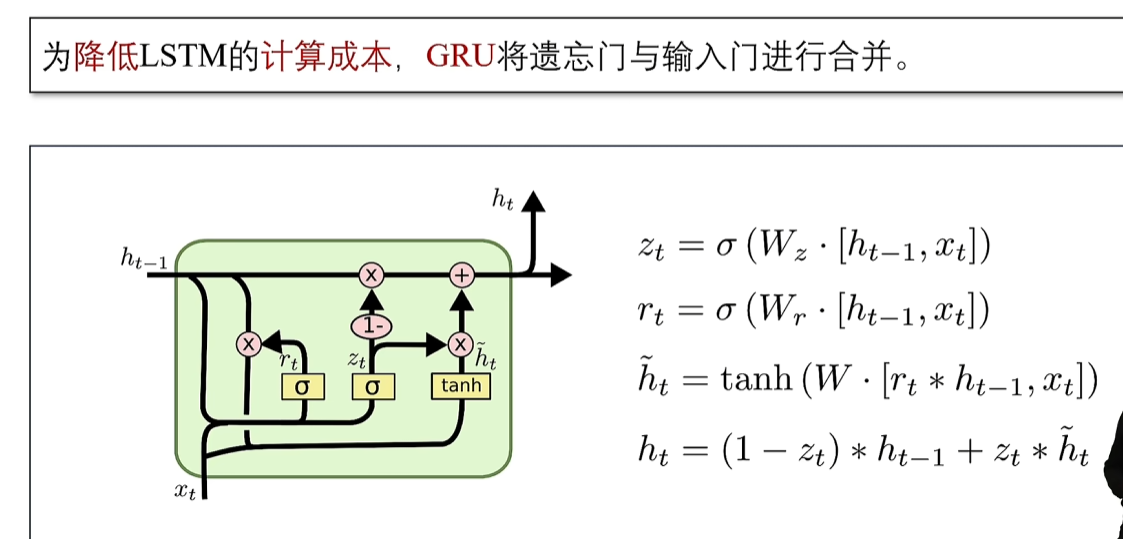

In [2]:
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(GRU, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim

        # 初始化权重矩阵
        self.W_z = nn.Parameter(torch.randn(hidden_dim, input_dim + hidden_dim))  # 更新门
        self.b_z = nn.Parameter(torch.zeros(hidden_dim))

        self.W_r = nn.Parameter(torch.randn(hidden_dim, input_dim + hidden_dim))  # 重置门
        self.b_r = nn.Parameter(torch.zeros(hidden_dim))

        self.W_h = nn.Parameter(torch.randn(hidden_dim, input_dim + hidden_dim))  # 候选隐藏状态
        self.b_h = nn.Parameter(torch.zeros(hidden_dim))

    def forward(self, x, h_prev):
        """
        x: 当前时间步的输入 [batch_size, input_dim]
        h_prev: 上一个时间步的隐藏状态 [batch_size, hidden_dim]
        """
        combined = torch.cat((x, h_prev), dim=1)  # [batch_size, input_dim + hidden_dim]

        # 更新门
        z_t = torch.sigmoid(torch.matmul(combined, self.W_z.T) + self.b_z)  # [batch_size, hidden_dim]

        # 重置门
        r_t = torch.sigmoid(torch.matmul(combined, self.W_r.T) + self.b_r)  # [batch_size, hidden_dim]

        # 候选隐藏状态
        combined_reset = torch.cat((x, r_t * h_prev), dim=1)  # [batch_size, input_dim + hidden_dim]
        h_tilde = torch.tanh(torch.matmul(combined_reset, self.W_h.T) + self.b_h)  # [batch_size, hidden_dim]

        # 当前隐藏状态
        h_t = (1 - z_t) * h_prev + z_t * h_tilde  # [batch_size, hidden_dim]

        return h_t

# 测试手动实现的GRU
manual_gru = GRU(input_dim, hidden_dim)

# 随机生成输入数据
h_t = torch.zeros(batch_size, hidden_dim)

# 按时间步处理序列数据
for t in range(seq_len):
    x_t = inputs[:, t, :]  # 当前时间步的输入
    h_t = manual_gru(x_t, h_t)

print("Final hidden state:", h_t)

Final hidden state: tensor([[-0.4717, -0.1948, -0.1468,  0.5848],
        [-0.0902, -0.1007, -0.2961,  0.2356]], grad_fn=<AddBackward0>)


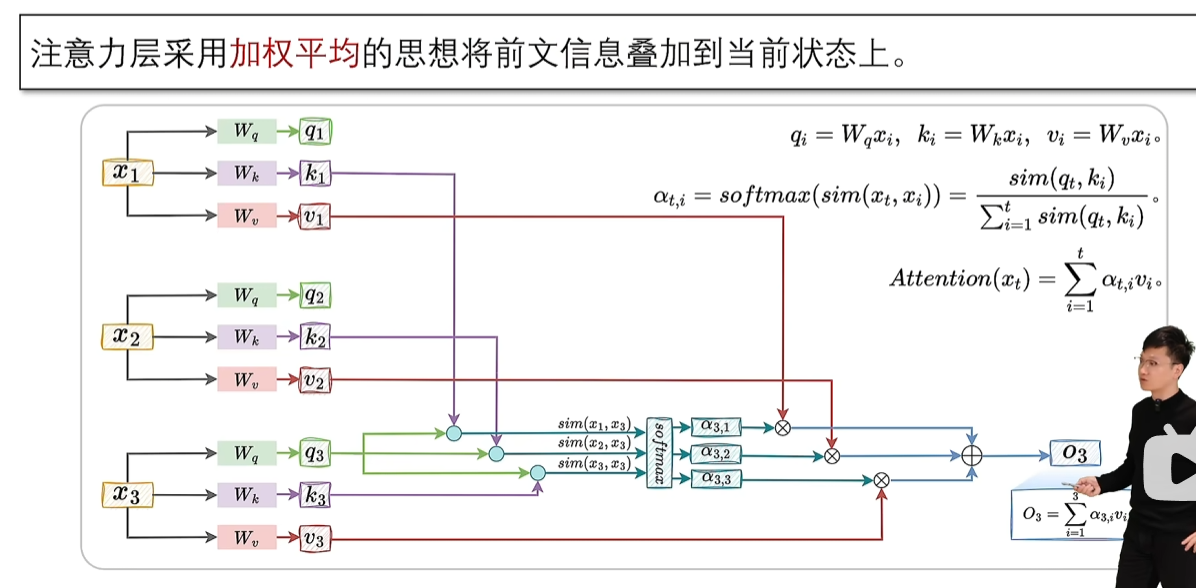

In [4]:
class ManualAttention(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(ManualAttention, self).__init__()
        self.W_q = nn.Linear(input_dim, hidden_dim)  # Query 权重
        self.W_k = nn.Linear(input_dim, hidden_dim)  # Key 权重
        self.W_v = nn.Linear(input_dim, hidden_dim)  # Value 权重

    def forward(self, queries, keys, values):
        """
        queries: 查询向量 [batch_size, seq_len, input_dim]
        keys: 键向量 [batch_size, seq_len, input_dim]
        values: 值向量 [batch_size, seq_len, input_dim]
        """
        Q = self.W_q(queries)  # [batch_size, seq_len, hidden_dim]
        K = self.W_k(keys)     # [batch_size, seq_len, hidden_dim]
        V = self.W_v(values)   # [batch_size, seq_len, hidden_dim]

        # 计算注意力分数
        scores = torch.matmul(Q, K.transpose(-2, -1)) / (hidden_dim ** 0.5)  # [batch_size, seq_len, seq_len]
        attention_weights = F.softmax(scores, dim=-1)  # [batch_size, seq_len, seq_len]

        # 加权求和
        output = torch.matmul(attention_weights, V)  # [batch_size, seq_len, hidden_dim]
        return output, attention_weights

# 测试手动实现的注意力机制
manual_attention = ManualAttention(input_dim, hidden_dim)

# 使用 inputs 作为 queries, keys 和 values
queries = inputs
keys = inputs
values = inputs

# 前向传播
output, attention_weights = manual_attention(queries, keys, values)

print("Attention Output:", output)
print("Attention Weights:", attention_weights)

Attention Output: tensor([[[ 0.2633,  0.5533, -0.0510,  0.1867],
         [ 0.2299,  0.5554,  0.0034,  0.2367],
         [ 0.3462,  0.5664, -0.0792,  0.1417],
         [ 0.2691,  0.5579, -0.0307,  0.2000],
         [ 0.2593,  0.5598, -0.0069,  0.2204]],

        [[ 0.3875,  0.4343,  0.2322,  0.2456],
         [ 0.3493,  0.4358,  0.2808,  0.2936],
         [ 0.3451,  0.4369,  0.3054,  0.3117],
         [ 0.3053,  0.4380,  0.2979,  0.3242],
         [ 0.3139,  0.4376,  0.2974,  0.3201]]], grad_fn=<UnsafeViewBackward0>)
Attention Weights: tensor([[[0.1195, 0.2816, 0.1415, 0.1850, 0.2724],
         [0.0544, 0.2406, 0.2067, 0.1647, 0.3336],
         [0.1644, 0.2175, 0.1957, 0.1974, 0.2251],
         [0.0957, 0.2454, 0.1906, 0.1832, 0.2851],
         [0.0676, 0.2248, 0.2270, 0.1731, 0.3075]],

        [[0.1859, 0.2101, 0.1707, 0.2191, 0.2142],
         [0.1943, 0.1935, 0.2648, 0.1685, 0.1789],
         [0.2196, 0.1889, 0.3023, 0.1363, 0.1530],
         [0.1546, 0.1869, 0.3177, 0.1633, 0.1775

In [6]:
class ManualAttentionWithLayerNorm(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(ManualAttentionWithLayerNorm, self).__init__()
        self.W_q = nn.Linear(input_dim, hidden_dim)  # Query 权重
        self.W_k = nn.Linear(input_dim, hidden_dim)  # Key 权重
        self.W_v = nn.Linear(input_dim, hidden_dim)  # Value 权重
        self.layer_norm = nn.LayerNorm(hidden_dim)   # 添加层正则化

    def forward(self, queries, keys, values):
        """
        queries: 查询向量 [batch_size, seq_len, input_dim]
        keys: 键向量 [batch_size, seq_len, input_dim]
        values: 值向量 [batch_size, seq_len, input_dim]
        """
        Q = self.W_q(queries)  # [batch_size, seq_len, hidden_dim]
        K = self.W_k(keys)     # [batch_size, seq_len, hidden_dim]
        V = self.W_v(values)   # [batch_size, seq_len, hidden_dim]

        # 计算注意力分数
        scores = torch.matmul(Q, K.transpose(-2, -1)) / (hidden_dim ** 0.5)  # [batch_size, seq_len, seq_len]
        attention_weights = F.softmax(scores, dim=-1)  # [batch_size, seq_len, seq_len]

        # 加权求和
        output = torch.matmul(attention_weights, V)  # [batch_size, seq_len, hidden_dim]

        # 应用层正则化
        output = self.layer_norm(output)

        return output, attention_weights

# 测试加入层正则化的注意力机制
manual_attention_with_ln = ManualAttentionWithLayerNorm(input_dim, hidden_dim)

# 使用 inputs 作为 queries, keys 和 values
queries = inputs
keys = inputs
values = inputs

# 前向传播
output, attention_weights = manual_attention_with_ln(queries, keys, values)

print("Attention Output with LayerNorm:", output)
print("Attention Weights:", attention_weights)

Attention Output with LayerNorm: tensor([[[-1.5090,  0.8652,  0.9409, -0.2972],
         [-1.4991,  0.8898,  0.9270, -0.3178],
         [-1.4953,  0.8774,  0.9425, -0.3247],
         [-1.4999,  0.8802,  0.9355, -0.3158],
         [-1.4954,  0.8906,  0.9297, -0.3249]],

        [[-1.4166,  0.1235,  1.4021, -0.1090],
         [-1.4110,  0.0981,  1.4105, -0.0975],
         [-1.4172,  0.1347,  1.3997, -0.1173],
         [-1.4049,  0.0800,  1.4180, -0.0932],
         [-1.4068,  0.0869,  1.4155, -0.0956]]],
       grad_fn=<NativeLayerNormBackward0>)
Attention Weights: tensor([[[0.2051, 0.1669, 0.2467, 0.1990, 0.1824],
         [0.2229, 0.1798, 0.2156, 0.2002, 0.1815],
         [0.1954, 0.1901, 0.2165, 0.1998, 0.1981],
         [0.2097, 0.1803, 0.2227, 0.2000, 0.1872],
         [0.2171, 0.1868, 0.2088, 0.2004, 0.1869]],

        [[0.1999, 0.1987, 0.2158, 0.1912, 0.1943],
         [0.2128, 0.2020, 0.1981, 0.1927, 0.1944],
         [0.1908, 0.1999, 0.1983, 0.2062, 0.2048],
         [0.2224, 0.1

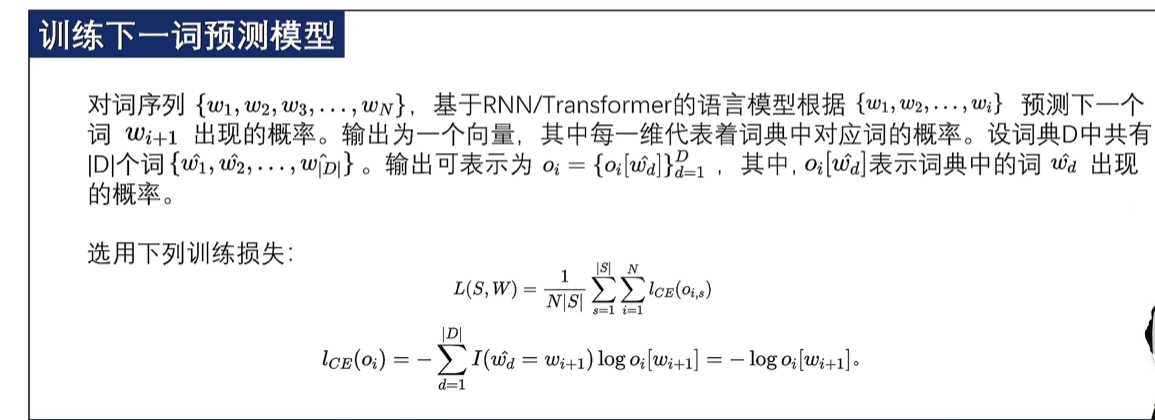

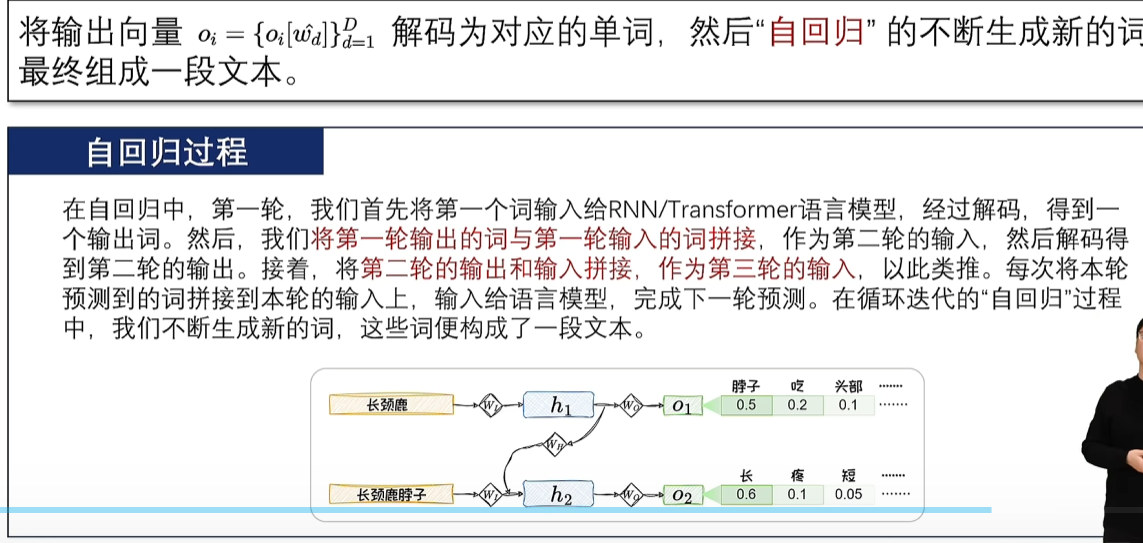

错误的级联放大 and 串行
- 加入 Teacher forcing.利用自回归能看见前面的输入的特性，强迫它从一个固定的模板开始生成
- 好处 可以增大并行程度，同时防止错误放大



In [16]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.utils import get_tokenizer
import torchtext
import torchtext.transforms as T
import torchtext.datasets as datasets
import torchtext.utils as utils


# 数据预处理
tokenizer = get_tokenizer("basic_english")

# 本地文件路径
train_file = "wiki.train.txt"
valid_file = "wiki.valid.txt"
test_file = "wiki.test.txt"

# 加载本地数据
def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            yield line.strip()

train_iter = load_data(train_file)
valid_iter = load_data(valid_file)
test_iter = load_data(test_file)

# 构建词汇表
def yield_tokens(data_iter):
    for text in data_iter:
        yield tokenizer(text)

vocab = build_vocab_from_iterator(yield_tokens(load_data(train_file)), specials=["<unk>", "<pad>", "<bos>", "<eos>"])
vocab.set_default_index(vocab["<unk>"])

# 数据集类
class TextDataset(Dataset):
    def __init__(self, data_iter, vocab, tokenizer, seq_len=32):
        self.data = []
        self.vocab = vocab
        self.tokenizer = tokenizer
        self.seq_len = seq_len
        for text in data_iter:
            tokens = [vocab["<bos>"]] + [vocab[token] for token in tokenizer(text)] + [vocab["<eos>"]]
            for i in range(0, len(tokens) - seq_len):
                self.data.append((tokens[i:i+seq_len], tokens[i+1:i+seq_len+1]))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.tensor(self.data[idx][0]), torch.tensor(self.data[idx][1])

# 加载数据
seq_len = 32
train_dataset = TextDataset(load_data(train_file), vocab, tokenizer, seq_len)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


OSError: [WinError 127] 找不到指定的程序。

In [17]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
if torch.cuda.is_available():
    print(f"Number of GPUs: {torch.cuda.device_count()}")
    print(f"GPU Name: {torch.cuda.get_device_name(0)}") # 打印第一个GPU名称

2.6.0+cpu
False
